In [109]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
!pip install --upgrade kneed

Requirement already up-to-date: kneed in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [111]:
# Importing the important librairies
import numpy as np
import pandas as pd
from statistics import mode
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling
from sklearn.decomposition import PCA
import pylab as pl
from kneed import KneeLocator
import pickle

In [112]:
data = pd.read_excel('/content/drive/My Drive/Data_Science/OxCGRT_latest-CAPABLE.xlsx')

In [113]:
data.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
data.columns

Index(['CountryName', 'CountryCode', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'ContainmentHealthIn

# **Relevant columns which can be appropiate features to identify a country according to it’s COVID-19 record.**

In [115]:
# This prints the unique values in the columns and their lengths
for i in data.columns.tolist():
  print(i)
  print(str(data[i].unique()) +" " + str(len(data[i].unique())))
  # print(str(str(len(data[i].unique()))))

  print('-----------')

CountryName
['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium'
 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil'
 'Barbados' 'Brunei' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon'
 'Democratic Republic of Congo' 'Congo' 'Colombia' 'Cape Verde'
 'Costa Rica' 'Cuba' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt'
 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon' 'United Kingdom'
 'Georgia' 'Ghana' 'Guinea' 'Gambia' 'Greece' 'Greenland' 'Guatemala'
 'Guam' 'Guyana' 'Hong Kong' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'India' 'Ireland' 'Iran' 'Iraq' 'Iceland' 'Israel' 'Italy'
 'Jamaica' 'Jordan' 'Japan' 'Kazakhstan' 'Kenya' 'Kyrgyz Republic'
 'Cambodia' 'South Korea

In [116]:
len(data.columns)

42

In [117]:
data.shape

(26818, 42)

In [118]:
# selected_data.isnull().sum()
for i in data.columns :
  print(i+ "     "+str(((data[i].isnull().sum())/data.shape[0])*100) + "%")

CountryName     0.0%
CountryCode     0.0%
Date     0.0%
C1_School closing     3.863077037810426%
C1_Flag     51.62204489521963%
C2_Workplace closing     4.0271459467521815%
C2_Flag     57.86039227384593%
C3_Cancel public events     4.0271459467521815%
C3_Flag     50.723394734879555%
C4_Restrictions on gatherings     4.06070549630845%
C4_Flag     56.861063464837045%
C5_Close public transport     4.317995376239839%
C5_Flag     68.2041912148557%
C6_Stay at home requirements     4.1837571780147655%
C6_Flag     61.43634872100828%
C7_Restrictions on internal movement     4.2695204713252295%
C7_Flag     60.39973152360355%
C8_International travel controls     3.844432843612499%
E1_Income support     4.310537698560668%
E1_Flag     74.45372511000075%
E2_Debt/contract relief     4.329181892758595%
E3_Fiscal measures     4.616302483406668%
E4_International support     4.496979640539936%
H1_Public information campaigns     4.288164665523156%
H1_Flag     33.84667014691625%
H2_Testing policy     5.02

In [119]:
# This is where we are deleting the columns that we do not need for our model
# We drop the country and Country code because these are the values that we are trying to predict
# We drop the M1_Wildcard because all its values were null
# We drop the C flags columns because they had more than 60% null values
selected_data = data.drop(['M1_Wildcard','CountryName','CountryCode','Date',"C5_Flag","C6_Flag","C7_Flag","E1_Flag","E1_Flag","StringencyIndexForDisplay", "StringencyLegacyIndexForDisplay","GovernmentResponseIndexForDisplay","EconomicSupportIndexForDisplay","ContainmentHealthIndexForDisplay"],axis = 1)

In [120]:
len(selected_data.columns)
selected_copy = selected_data.copy()

# **Clusters/classes of similar records using features selected,  use an unsupervised learning algorithm of your choice**

## **1. Normalizing the data**

In [121]:
selected_data.head()

,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex
0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [122]:
selected_data['H4_Emergency investment in healthcare']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26813    0.0
26814    0.0
26815    0.0
26816    NaN
26817    NaN
Name: H4_Emergency investment in healthcare, Length: 26818, dtype: float64

In [123]:
# We need to replace the null values, and this case , we will use the main and the mode to replace values
for i in selected_data.columns:
  if (selected_data[i].mean() < 2):
    selected_data[i].fillna(selected_data[i].mode()[0], inplace=True)
    selected_data[i].astype(int)
  else:
    selected_data[i].fillna(selected_data[i].mean(), inplace=True)

In [124]:
# for i in selected_data.columns.tolist():
#   print(i)
#   print(str(selected_data[i].unique()))
#   print('-----------')

In [125]:
# def categories_convert(dataframe, columns_names):
#   for i in columns_names:
#     label = selected_data[i].astype('category').cat.categories.tolist()
#     replace_map_comp = {i : {k: v for k,v in zip(label,list(range(1,len(label)+1)))}}
#     selected_data.replace(replace_map_comp, inplace=True)
# categories_convert(selected_data, get_dummies_list)

In [126]:
scaler = MinMaxScaler()
selected_data[list(selected_data.columns)] = scaler.fit_transform(selected_data[list(selected_data.columns)])

In [127]:
selected_data.head()

,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006945,0.007817,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006945,0.007817,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006945,0.007817,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006945,0.007817,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006945,0.007817,0.0,0.0,0.0,0.0,0.0


In [128]:
for i in selected_data.columns.tolist():
  print(i + str(selected_copy[i].unique()))
  print('-----------')

C1_School closing[ 0.  3. nan  2.  1.]
-----------
C1_Flag[nan  1.  0.]
-----------
C2_Workplace closing[ 0.  2.  3. nan  1.]
-----------
C2_Flag[nan  1.  0.]
-----------
C3_Cancel public events[ 0.  2. nan  1.]
-----------
C3_Flag[nan  1.  0.]
-----------
C4_Restrictions on gatherings[ 0.  4. nan  2.  3.  1.]
-----------
C4_Flag[nan  1.  0.]
-----------
C5_Close public transport[ 0. nan  2.  1.]
-----------
C6_Stay at home requirements[ 0.  1.  2.  3. nan]
-----------
C7_Restrictions on internal movement[ 0.  2. nan  1.]
-----------
C8_International travel controls[ 0.  3.  4. nan  1.  2.]
-----------
E1_Income support[ 0.  2. nan  1.]
-----------
E2_Debt/contract relief[ 0. nan  2.  1.]
-----------
E3_Fiscal measures[0.00000000e+00            nan 1.27711935e+08 9.00000000e+06
 1.77069498e+07 1.41399000e+08 4.80000000e+08 4.08000000e+08
 2.70000000e+10 4.24778761e+10 1.00000000e+10 4.65872314e+08
 7.49715110e+07 1.10000000e+10 3.79986245e+10 6.63117139e+08
 8.02230000e+10 9.70999874e+

## **2. Choosing the K**

In [129]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(selected_data)
    sse.append(kmeans.inertia_)

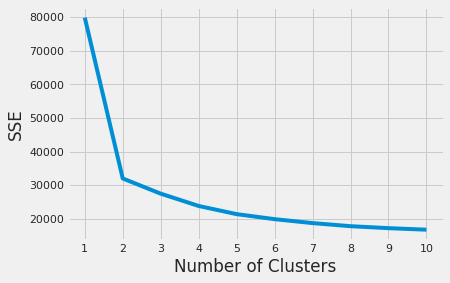

In [130]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [131]:
model = KMeans(n_clusters=4, random_state=111)
model.fit(selected_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [132]:
prediction = model.predict(selected_data)

# **Visualise the clusters using appropriate graphs**

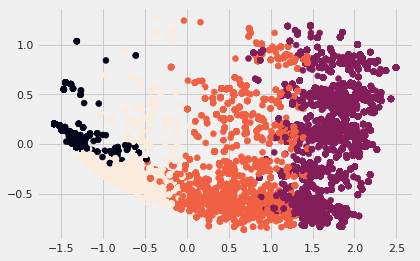

In [133]:
pca = PCA(n_components=2).fit(selected_data)
pca_2d = pca.transform(selected_data)
pl.figure('K-means with 4 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=model.labels_)
pl.show()

#**Create a platform where new records of countries can be classified in the clusters**

In [134]:
#@title #**PLEASE INTER NEW VALUES FOR PREDICTION**

C1_School_closing = 1 #@param [0,1,2,3]
C1_Flag = 1 #@param [0,1]
C2_Workplace_closing = 1 #@param [0,1,2,3]
C2_Flag = 1 #@param [0,1,2]
C3_Cancel_public_events = 1 #@param [0,1,2]
C3_Flag =  "0" #@param [0,1]
C4_Restrictions_on_gatherings =  "2" #@param [0,1,2,3,4]
C4_Flag =  1 #@param [0,1]
C5_Close_public_transport =  1 #@param [0,1,2]
C6_Stay_at_home_requirements =  1 #@param [0,1,2,3]
C7_Restrictions_on_internal_movement =  1 #@param [0,1,2]
C8_International_travel_controls =  1 #@param [0,1,2,3,4]
E1_Income_support =  1 #@param [0,1,2]
E2_Debt_contract_relief = 1 #@param [0,1]

E3_Fiscal_measures =  6616661#@param {type:"integer"}
E4_International_support = 526526#@param {type:"integer"}

H1_Public_information_campaigns =  1 #@param [0,1,2]
H1_Flag =  "0" #@param [0,1]
H2_Testing_policy =  1 #@param [0,1,2,3]
H3_Contact_tracing =  1 #@param [0,1,2]

H4_Emergency_investment_in_healthcare = 55555#@param {type:"integer"}

H5_Investment_in_vaccines = 20#@param {type:"integer"}
ConfirmedCases = 6262#@param {type:"integer"}
ConfirmedDeaths = 5659598459#@param {type:"integer"}
StringencyIndex = 545#@param {type:"integer"}
StringencyLegacyIndex = 1526265#@param {type:"integer"}
GovernmentResponseIndex = 5223#@param {type:"integer"}
ContainmentHealthIndex = 15296529#@param {type:"integer"}
EconomicSupportIndex = 48111#@param {type:"integer"}

# usinf these values for prediction
Data_list = [C1_School_closing, C1_Flag, C2_Workplace_closing,C2_Flag,C3_Cancel_public_events,C3_Flag,C4_Restrictions_on_gatherings, C4_Flag,C5_Close_public_transport, C6_Stay_at_home_requirements,C7_Restrictions_on_internal_movement,C8_International_travel_controls,E1_Income_support, E2_Debt_contract_relief,E3_Fiscal_measures,E4_International_support,H1_Public_information_campaigns,H1_Flag, H2_Testing_policy,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex]

form_df = pd.DataFrame([Data_list], columns = selected_data.columns.tolist())
for i in form_df.columns:
  form_df[i] = form_df[i].astype(int)
prediction = model.predict(form_df)

print('The predicted value is '+str(prediction[0]))


The predicted value is 1
